In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\ayh17\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Overview of Gradient Descent

Gradient descent is an iterative optimization algorithm.
It aims to find the optimal values of randomly-initalized model parameters by trying to minimize a cost function.

##### steps of gradient descent diagram

##### Parameter update equation

There are two points to consider when updating parameters:
a. The gradient of the cost function.
As we approach the global minimum, the gradients gets closer to zero.
This results in slower updates, and, therefore, smaller steps.
b. The learning rate

# Types of Gradient Descent

Gradient descent can be classified depending on the number of training examples on which you compute the cost function and, subsequently, the gradients.

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-batch Gradient Descent

### Batch Gradient Descent

- The cost function and the gradients are computed over the entire training set.
- Because the calculations are averaged over the entire training set, the error is guaranteed to drop at every step (stable performance).

In [25]:
np.random.seed(42)

m = 1000 
X = 2 * np.random.rand(m,1) 
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = add_dummy_feature(X)

In [5]:
m = len(X_b)
n_epochs = 100
eta = 0.1

np.random.seed(42)
theta = np.random.randn(2,1)

theta_path_bgd = []
gradient_vals = []
mse_bgd = []
for epoch in range(n_epochs):
    mse_bgd.append(mean_squared_error(y, X_b @ theta))
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)
    gradient_vals.append(gradients)

In [6]:
mse_bgd = np.array(mse_bgd)
theta_path_bgd = np.array(theta_path_bgd).reshape(100,2)
gradient_vals = np.array(gradient_vals).reshape(100,2)

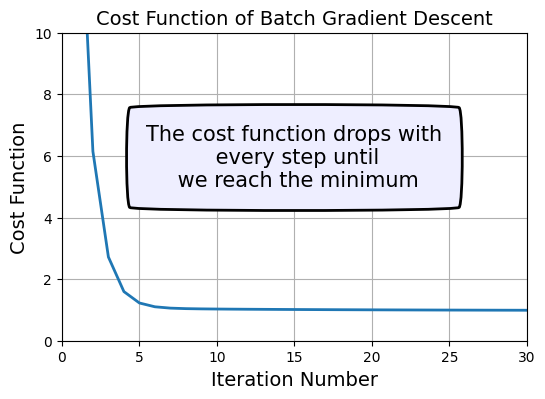

In [7]:
plt.figure(figsize=(6,4))
plt.plot(mse_bgd, linewidth=2)
plt.axis([0, 30, 0, 10])
plt.grid()
plt.xlabel('Iteration Number')
plt.ylabel('Cost Function')
plt.title('Cost Function of Batch Gradient Descent')

# text properties
bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
plt.text(15, 5, "The cost function drops with\n every step until\n we reach the minimum",
         fontsize=15, color='black',
         ha="center", bbox=bbox_props)
plt.savefig('images/bgd_cost.jpg', bbox_inches='tight');

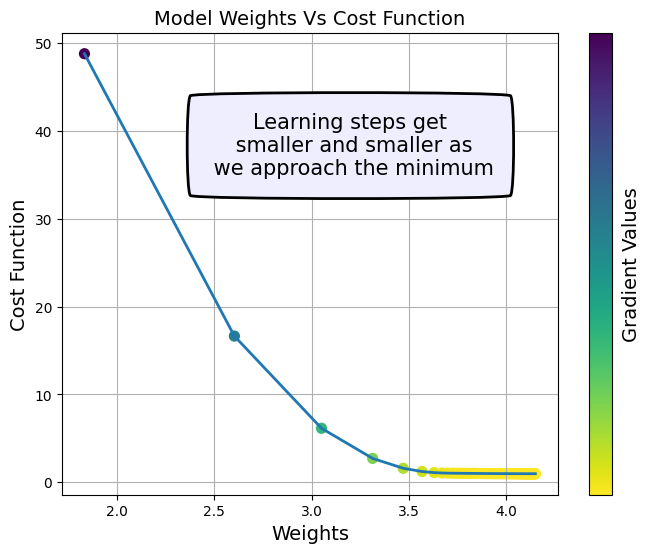

In [9]:
# colors = []
# for i in gradient_vals:
#     colors.append(mpl.colors.hex2color(mpl.cm.viridis_r(np.abs(i[0] * 2))))
# colors = np.array(colors)

plt.figure(figsize=(8,6))
plt.plot(theta_path_bgd[..., 0], mse_bgd, linewidth=2)
plt.scatter(x = theta_path_bgd[..., 0], y = mse_bgd, c=np.abs(gradient_vals[..., 0]), cmap='viridis_r', s=50)
plt.xlabel('Weights')
plt.ylabel('Cost Function')
plt.colorbar(ticks=[], label='Gradient Values')
plt.grid()
plt.title('Model Weights Vs Cost Function')
# text properties
bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
plt.text(3.2, 35, "Learning steps get\n smaller and smaller as\n we approach the minimum",
         fontsize=15, color='black',
         ha="center", bbox=bbox_props)
plt.savefig('images/learning_steps_vs_gradients.jpg', bbox_inches='tight');

Model parameters also receive regular updates until they converge to their optimal values.

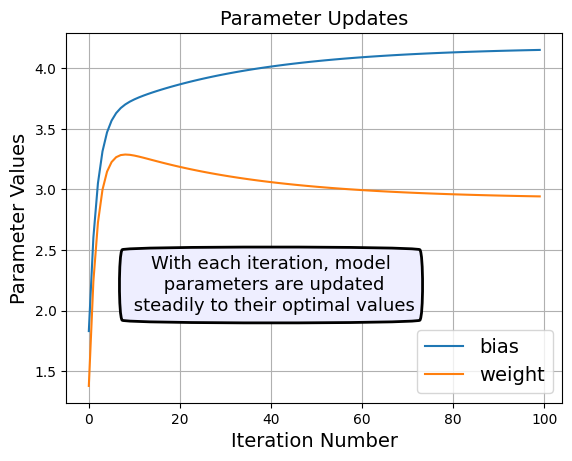

In [10]:
plt.plot(theta_path_bgd[..., 0], label='bias')
plt.plot(theta_path_bgd[..., 1], label='weight')
plt.grid()
plt.xlabel('Iteration Number')
plt.ylabel('Parameter Values')
plt.title('Parameter Updates')
plt.legend()

# text
bbox_props = dict(boxstyle="round4,pad=0.5,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
plt.text(40, 2, "With each iteration, model\n parameters are updated\n steadily to their optimal values",
         fontsize=13, color='black',
         ha="center", bbox=bbox_props)
plt.savefig('images/bgd_parameter_updates.jpg', bbox_inches='tight');

##### Disadvantages of Batch Gradient Descent
a. Because it includes calculations over the entire training set, it is very slow with huge datasets.
b. Batch gradient descent can easily get stuck at local minima (where the gradient is almost zero and the training stops).

### Stochastic Gradient Descent

- It computes the cost function and the gradients on a single training examples.
- This makes it really fast with huge training sets.

- Because gradient calculations are computed on a random training example at each iteration, stochastic GD is very irregular (much less stable than Batch GD).

- The cost function (and gradients) will bounce up and down, decreasing only on average without settling at the minimum.

In [11]:
np.random.seed(42)
theta = np.random.randn(2,1)

n_epochs = 70
eta = 0.1
m = len(X_b)

theta_vals = []
gradient_vals = []
mse_sgd = []
for epoch in range(n_epochs):
    for iteration in range(m): # in each epoch, we iterate through the entire training set
        random_idx = np.random.randint(m) # pick a random training instance
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        mse_sgd.append(mean_squared_error(y, X_b @ theta))
        gradients = 2 * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients
        theta_vals.append(theta)
        gradient_vals.append(gradients)

In [12]:
mse_sgd = np.array(mse_sgd)
theta_vals = np.array(theta_vals).reshape(-1,2)
gradient_vals = np.array(gradient_vals).reshape(-1,2)

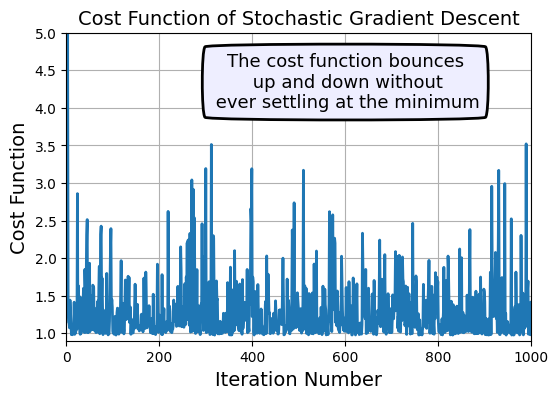

In [13]:
plt.figure(figsize=(6,4))
plt.plot(mse_sgd, linewidth=2)
plt.axis([0, 1000, 0.9, 5])
plt.grid()
plt.xlabel('Iteration Number')
plt.ylabel('Cost Function')
plt.title('Cost Function of Stochastic Gradient Descent')

# text properties
bbox_props = dict(boxstyle="round4,pad=0.5,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
plt.text(600, 4, "The cost function bounces\n up and down without\n ever settling at the minimum",
         fontsize=13, color='black',
         ha="center", bbox=bbox_props)

plt.savefig('images/sgd_cost.jpg', bbox_inches='tight');

- Once the training stops, you will end up with good but suboptimal parameter values.
- Another disadvantage is that you will lose hardware optimization for vectorized operations.

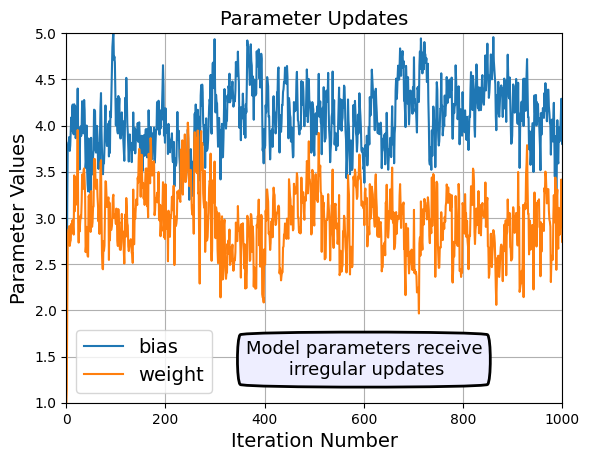

In [14]:
plt.plot(theta_vals[..., 0], label='bias')
plt.plot(theta_vals[..., 1], label='weight')
plt.grid()
plt.xlabel('Iteration Number')
plt.ylabel('Parameter Values')
plt.title('Parameter Updates')
plt.legend()
plt.axis([0, 1000, 1,5])

# text
bbox_props = dict(boxstyle="round4,pad=0.5,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
plt.text(600, 1.3, "Model parameters receive\n irregular updates",
         fontsize=13, color='black',
         ha="center", bbox=bbox_props)

plt.savefig('images/sgd_parameter_updates.jpg', bbox_inches='tight');

- The upside of this irregularity in parameter updates is that stochastic GD has a much better chance to escape from local minima.
- We can minimize the erratic behavior of stochastic GD by reducing the learning rate as we approach the global minimum (learning schedule).

In [15]:
theta_path_sgd = []
gradient_vals = []
mse_sgd_ls = []

n_epochs = 50
t0, t1 = 5, 50 # learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1)


for epoch in range(n_epochs):
    for iteration in range(m):        
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        mse_sgd_ls.append(mean_squared_error(y, X_b @ theta))
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        gradient_vals.append(gradients)

In [16]:
theta_path_sgd = np.array(theta_path_sgd).reshape(-1,2)
gradient_vals = np.array(gradient_vals).reshape(-1,2)
mse_sgd_ls = np.array(mse_sgd_ls).reshape(-1)

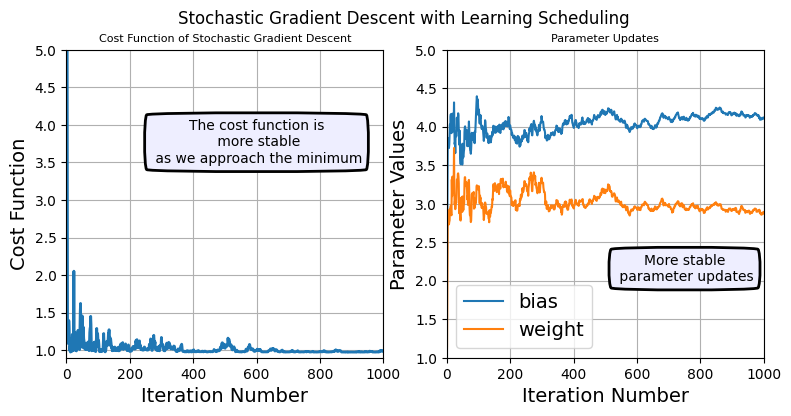

In [17]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
ax1, ax2 = axes
ax1.plot(mse_sgd_ls, linewidth=2)
ax1.axis([0, 1000, 0.9, 5])
plt.grid()
ax1.set_xlabel('Iteration Number')
ax1.set_ylabel('Cost Function')
ax1.set_title('Cost Function of Stochastic Gradient Descent', fontsize=8)
ax1.grid()


ax2.plot(theta_path_sgd[..., 0], label='bias')
ax2.plot(theta_path_sgd[..., 1], label='weight')
ax2.grid()
ax2.set_xlabel('Iteration Number')
ax2.set_ylabel('Parameter Values')
ax2.set_title('Parameter Updates', fontsize=8)
ax2.legend()
ax2.axis([0, 1000, 1,5])
ax2.grid()

plt.suptitle('Stochastic Gradient Descent with Learning Scheduling', fontsize=12)

# text
bbox_props = dict(boxstyle="round4,pad=0.5,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
ax1.text(600, 3.5, "The cost function is\n more stable\n as we approach the minimum",
         fontsize=10, color='black',
         ha="center", bbox=bbox_props);

ax2.text(750, 2, "More stable\n parameter updates",
         fontsize=10, color='black',
         ha="center", bbox=bbox_props)

plt.savefig('images/sgd_learning_schedule.jpg', bbox_inches='tight');

### Mini-Batch Gradient Descent
- This algorithm sets in the middle between batch GD and stochastic GD.
- It computes the cost and the gradient on small random sets of instances called "mini-batches".
- It's still more irregular than Batch GD, but more stable than Stochastic GD.

##### Advantages of Batch GD
1. More stable than stochastic GD (more likely to reach a good solution).

2. Maintain the power of vectorization.

3. Since it processes only a small number of instances on every iteration, it can easily handle huge datasets.

In [18]:
import math

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = math.ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
gradient_vals = []
mse_mgd_ls = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx: idx + minibatch_size]
        yi = y_shuffled[idx: idx + minibatch_size]
        mse_mgd_ls.append(mean_squared_error(y, X_b @ theta))
        gradients = (2/minibatch_size) * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        gradient_vals.append(gradients)

In [19]:
theta_path_mgd = np.array(theta_path_mgd).reshape(-1,2)
gradient_vals = np.array(gradient_vals).reshape(-1,2)
mse_mgd_ls = np.array(mse_mgd_ls)

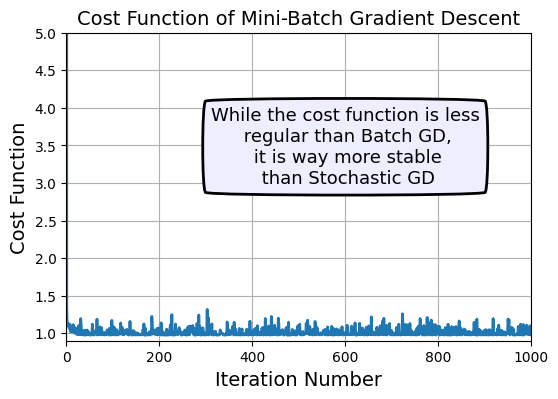

In [20]:
plt.figure(figsize=(6,4))
plt.plot(mse_mgd_ls, linewidth=2)
plt.axis([0, 1000, 0.9, 5])
plt.grid()
plt.xlabel('Iteration Number')
plt.ylabel('Cost Function')
plt.title('Cost Function of Mini-Batch Gradient Descent')

# text properties
bbox_props = dict(boxstyle="round4,pad=0.5,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
plt.text(600, 3, "While the cost function is less\n regular than Batch GD,\n it is way more stable\n than Stochastic GD",
         fontsize=13, color='black',
         ha="center", bbox=bbox_props)
plt.savefig('images/mgd_cost.jpg', bbox_inches='tight');

- model parameters also receive relatively stable updates which allows mini-batch GD to escape local minima while settling near the global minimum (Mini-batch GD bounce in a tightier region around the global minimum).

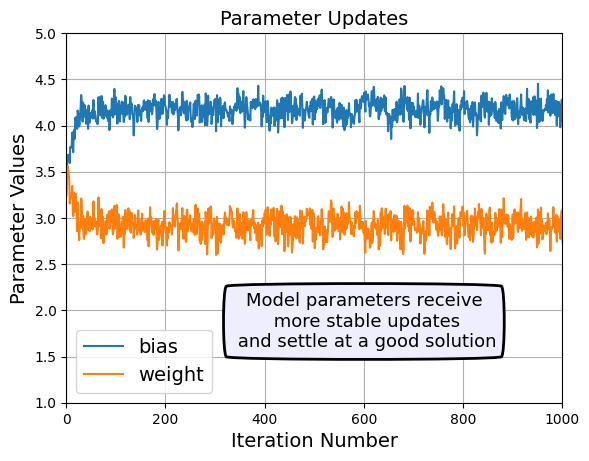

In [21]:
plt.plot(theta_path_mgd[..., 0], label='bias')
plt.plot(theta_path_mgd[..., 1], label='weight')
plt.grid()
plt.xlabel('Iteration Number')
plt.ylabel('Parameter Values')
plt.title('Parameter Updates')
plt.legend()
plt.axis([0, 1000, 1,5])

# text
bbox_props = dict(boxstyle="round4,pad=0.5,rounding_size=0.2", ec="black",
                  fc="#EEEEFF", lw=2)
plt.text(600, 1.6, "Model parameters receive\n more stable updates\n and settle at a good solution",
         fontsize=13, color='black',
         ha="center", bbox=bbox_props)

plt.savefig('images/mgd_parameter_updates.jpg', bbox_inches='tight');

##### Dummy data for creating a plot with local minimum

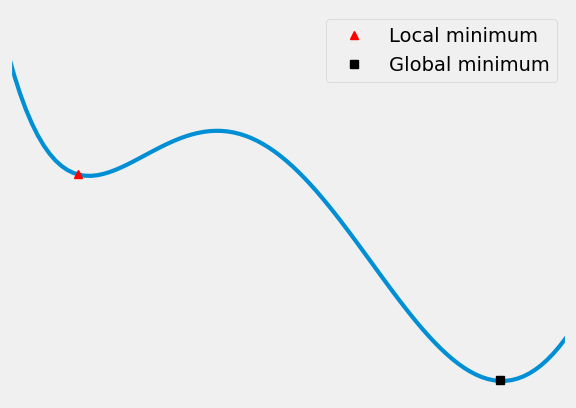

In [22]:
lm_df = pd.read_csv('datasets/local_min_data.csv')
X, y = lm_df['x'].values.reshape(-1,1), lm_df['y'].values
X_new = np.linspace(0, 600, 100).reshape(-1,1)


polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression())

polynomial_regression.fit(X, y)

predictions = polynomial_regression.predict(X_new)

with plt.style.context('fivethirtyeight'):
    plt.plot(X_new, predictions, linewidth=3)
    plt.xticks([])
    plt.yticks([])
    plt.axis([20, 590, 20, 450])
    plt.plot([90], [268], 'r^', label='Local minimum')
    plt.plot([522], [40], 'ks', label='Global minimum')
    plt.legend()
plt.savefig('images/global_vs_local_minima.jpg', bbox_inches='tight')

In [65]:
weight_range = np.linspace(-5, 12, 100)
bias_range = np.linspace(-5,12, 100)
theta_range = np.c_[bias_range, weight_range]
bias_grid, weight_grid = np.meshgrid(bias_range, weight_range)
bias_grid = bias_grid[20:80, 20:80]
weight_grid = weight_grid[20:80, 20:80]
random_theta = np.c_[bias_grid.flatten(), weight_grid.flatten()]


predictions = []
for theta in random_theta:
    predictions.append(X_b @ theta)

predictions = np.array(predictions)

costs = []


for pred in predictions:
    costs.append(mean_squared_error(y, pred))
    
costs = np.array(costs)

(2.6, 4.6, 2.3, 3.4)

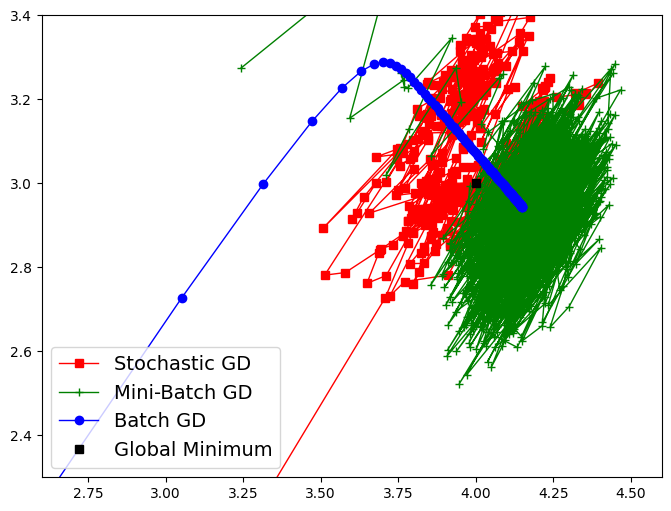

In [80]:
plt.figure(figsize=(8,6))
plt.contourf(bias_grid, weight_grid, costs.reshape(bias_grid.shape), levels=[i for i in np.linspace(10, 1000, 10000)])
plt.plot(theta_path_sgd[..., 0], theta_path_sgd[..., 1], 'r-s', linewidth=1, label='Stochastic GD')
plt.plot(theta_path_mgd[..., 0], theta_path_mgd[..., 1], 'g-+', linewidth=1, label='Mini-Batch GD')
plt.plot(theta_path_bgd[..., 0], theta_path_bgd[..., 1], 'b-o', linewidth=1, label='Batch GD')
plt.axis([0,8, -1, 5])
plt.plot([4], [3], 's', color='black', label = 'Global Minimum')
plt.legend()
plt.axis([2.6, 4.6, 2.3, 3.4])